# Exploratory Data Analysis

We will carry out an exploration of the ESNLI dataset before we fine-tune the T5 model.

In [4]:
import datasets
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
from datasets import load_metric

We will use the ESNLI dataset

In [5]:
esnli = datasets.load_dataset("esnli")

Found cached dataset esnli (/Users/lorenzorota/.cache/huggingface/datasets/esnli/plain_text/0.0.2/a160e6a02bbb8d828c738918dafec4e7d298782c334b5109af632fec6d779bbc)


  0%|          | 0/3 [00:00<?, ?it/s]

First row of train:
{'premise': 'A person on a horse jumps over a broken down airplane.', 'hypothesis': 'A person is training his horse for a competition.', 'label': 1, 'explanation_1': 'the person is not necessarily training his horse', 'explanation_2': '', 'explanation_3': ''}
First row of test:
{'premise': 'This church choir sings to the masses as they sing joyous songs from the book at a church.', 'hypothesis': 'The church has cracks in the ceiling.', 'label': 1, 'explanation_1': 'Not all churches have cracks in the ceiling', 'explanation_2': 'There is no indication that there are cracks in the ceiling of the church.', 'explanation_3': 'Not all churches have cracks in the ceiling.'} 

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'label', 'explanation_1', 'explanation_2', 'explanation_3'],
        num_rows: 549367
    })
    validation: Dataset({
        features: ['premise', 'hypothesis', 'label', 'explanation_1', 'explanation_2', 'explanation_3'],

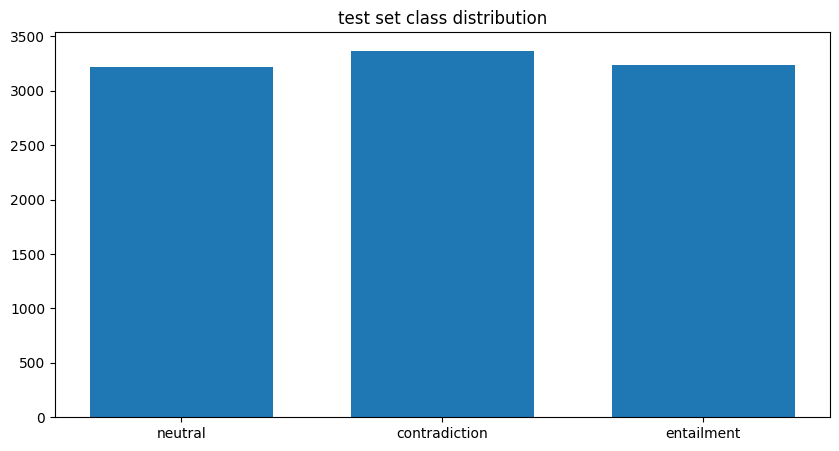

In [6]:
# this is for doing some exploratory analysis
def eda(name='train'):
    dt = esnli[name]
    print('Number of rows in train:',len(dt))
    Counter(dt['label'])
    labels, values = zip(*Counter(dt['label']).items())
    labels = ['neutral', 'contradiction', 'entailment', ] #(1,2,0)

    indexes = np.arange(len(labels))
    width = 1

    # plt.bar(indexes, values, width)
    plt.figure(figsize=(10, 5),dpi=100) 
    plt.bar(indexes, values, align='edge', width=0.7)
    plt.xticks(indexes + width * 0.35, labels)
    plt.title(name + " set class distribution")
    plt.show()

# Train-val-test split
esnli_train = esnli['train']
esnli_val = esnli['validation']
esnli_test = esnli['test']
print('First row of train:')
print(esnli_train[0])
print('First row of test:')
print(esnli_test[0],'\n')

#EDA
print(esnli,'\n')
eda('test')

TODO: comment and go more in-depth (there is probably more we can look into)